***Supply chain forecasting-sales prediction***

**Dataset** :  DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

Dataset link : https://drive.google.com/file/d/14D_mWnt8nMDgXevZmUs9CYuBkiDM-ZG3/view?usp=sharing

**Machine Learning and Statistical models for supply chain**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [ ]:
df=pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors="ignore")
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class


**Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
# Handling missing values
# Handling data types
# Handling categorical variables
# Handling outliers


In [ ]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [ ]:
df.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
df.drop(["Customer Email","Customer Password","Product Image","Customer Fname","Customer Fname"],axis=1,inplace=True)

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,NaN,1360,73,NaN,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,CLOSED,NaN,1360,73,NaN,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,COMPLETE,NaN,1360,73,NaN,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING_PAYMENT,NaN,1360,73,NaN,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df['Order Zipcode'].fillna(0, inplace=True)
df['Product Description'].fillna(0, inplace=True)

In [ ]:
df.rename(columns={"Type":"Type Of Payments"},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type Of Payments               180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Id                    180519 non-null  int64  
 12  Customer Lname                

**Data Analysis and Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df1=df["Order Status"].value_counts()
df1

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

Text(0.5, 1.0, 'Order Status')

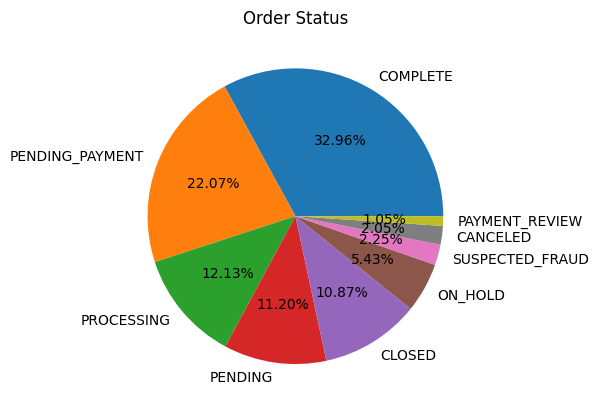

In [ ]:
label=["COMPLETE","PENDING_PAYMENT","PROCESSING","PENDING","CLOSED","ON_HOLD","SUSPECTED_FRAUD","CANCELED","PAYMENT_REVIEW"]
plt.pie(df1,labels=label, autopct='%1.2f%%')
plt.title("Order Status")

How many successfully processed orders have days for shipping real (Real) > Days for shipment (Scheduled)

In [ ]:
suc_pro=df[(df["Days for shipping (real)"])>(df["Days for shipment (scheduled)"])]

In [ ]:
suc_pro=suc_pro[(suc_pro["Order Status"]== "COMPLETE")]
suc_pro

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 10:42,First Class
13,DEBIT,2,1,24.580000,245.809998,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 8:15,First Class
15,DEBIT,2,1,-259.579987,324.470001,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 7:33,First Class
18,DEBIT,2,1,102.260002,314.640015,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 6:30,First Class
25,DEBIT,6,2,131.169998,285.140015,Late delivery,1,73,Sporting Goods,Caguas,...,COMPLETE,0.0,1360,73,0.0,Smart watch,327.750000,0,1/19/2018 4:03,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180479,DEBIT,6,4,133.839996,395.980011,Late delivery,1,45,Fishing,Las Vegas,...,COMPLETE,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/23/2016 22:24,Standard Class
180499,DEBIT,4,2,-258.779999,387.980011,Late delivery,1,45,Fishing,Caguas,...,COMPLETE,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 17:41,Second Class
180508,DEBIT,4,2,85.000000,339.980011,Late delivery,1,45,Fishing,Waipahu,...,COMPLETE,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 7:10,Second Class
180512,DEBIT,6,4,86.400002,319.980011,Late delivery,1,45,Fishing,Caguas,...,COMPLETE,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 6:07,Standard Class


In [ ]:
#by country

delivery_status=suc_pro.groupby(["Order Country"])["Order Status"].count().reset_index(name="Number of orders")
px.bar(delivery_status,x=delivery_status["Order Country"],y=delivery_status["Number of orders"],
       color=delivery_status["Number of orders"],
       labels={"Order Country":"Order Country","Number of orders":"Number of orders"})

List of country and number of pending orders in "Australia"

In [ ]:
pending_cities=df[(df["Order Country"]=="Australia") & (df["Order Status"]=="PENDING")]
pending_cities

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
22,TRANSFER,4,2,22.370001,298.250000,Late delivery,1,73,Sporting Goods,Rancho Cordova,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/17/2018 5:06,Second Class
26,TRANSFER,5,2,90.540001,278.589996,Late delivery,1,73,Sporting Goods,Wilkes Barre,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/18/2018 3:42,Second Class
370,TRANSFER,5,4,37.169998,309.720001,Late delivery,1,73,Sporting Goods,Bismarck,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/17/2018 17:11,Standard Class
390,TRANSFER,5,4,146.139999,298.250000,Late delivery,1,73,Sporting Goods,Rio Grande,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/17/2018 10:11,Standard Class
392,TRANSFER,3,4,-447.049988,288.420013,Advance shipping,0,73,Sporting Goods,Caguas,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 9:29,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180306,TRANSFER,5,2,40.400002,363.980011,Late delivery,1,45,Fishing,Mount Prospect,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2/1/2016 4:31,Second Class
180321,TRANSFER,4,4,106.389999,379.980011,Shipping on time,0,45,Fishing,Plano,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/30/2016 8:54,Standard Class
180411,TRANSFER,2,4,28.500000,379.980011,Advance shipping,0,45,Fishing,Caguas,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/24/2016 6:07,Standard Class
180491,TRANSFER,3,4,33.599998,335.980011,Advance shipping,0,45,Fishing,Caguas,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 5:35,Standard Class


Which country and city has maximum pending order

In [ ]:
order_pending=df[df["Order Status"]=="PENDING"]
order_pending

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
11,TRANSFER,5,2,45.689999,268.760010,Late delivery,1,73,Sporting Goods,Freeport,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/18/2018 8:57,Second Class
12,TRANSFER,4,2,21.760000,262.200012,Late delivery,1,73,Sporting Goods,Salinas,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/17/2018 8:36,Second Class
21,TRANSFER,5,4,82.300003,304.809998,Late delivery,1,73,Sporting Goods,Caguas,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/18/2018 5:27,Standard Class
22,TRANSFER,4,2,22.370001,298.250000,Late delivery,1,73,Sporting Goods,Rancho Cordova,...,PENDING,0.0,1360,73,0.0,Smart watch,327.750000,0,1/17/2018 5:06,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180414,TRANSFER,0,0,132.130005,363.980011,Shipping on time,0,45,Fishing,Washington,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/22/2016 12:51,Same Day
180458,TRANSFER,4,4,105.589996,319.980011,Shipping on time,0,45,Fishing,Caguas,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/23/2016 6:59,Standard Class
180485,TRANSFER,4,4,11.160000,371.980011,Shipping on time,0,45,Fishing,San Pablo,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/21/2016 14:42,Standard Class
180491,TRANSFER,3,4,33.599998,335.980011,Advance shipping,0,45,Fishing,Caguas,...,PENDING,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 5:35,Standard Class


In [ ]:
#order country
order_pending["Order Country"].value_counts()

Estados Unidos             2681
Mxico                      1526
Francia                    1500
Alemania                   1120
Australia                   944
                           ... 
Macedonia                     2
Repblica Centroafricana       2
Butn                          1
Sri Lanka                     1
Guinea Ecuatorial             1
Name: Order Country, Length: 138, dtype: int64

<Axes: title={'center': 'Countries with Pending Status'}>

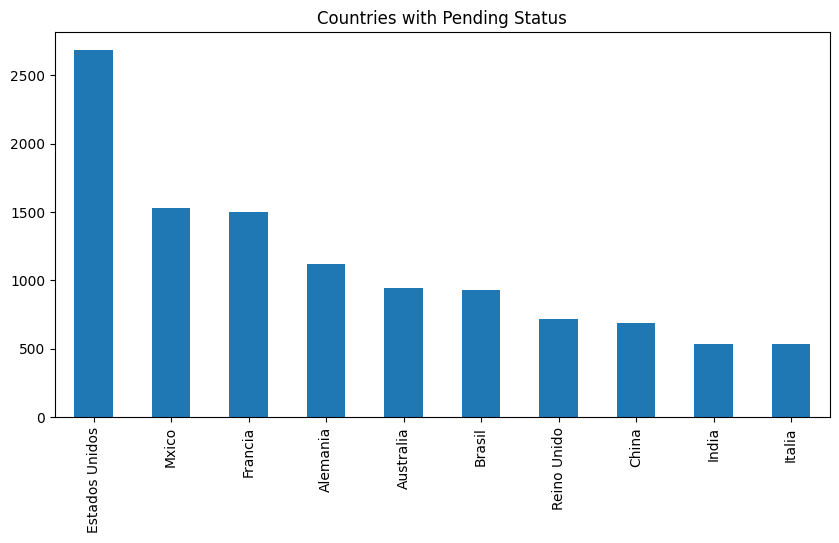

In [ ]:
order_pending["Order Country"].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Countries with Pending Status")

In [ ]:
#order city
order_pending["Order City"].value_counts()

Santo Domingo    248
New York City    232
Tegucigalpa      219
Los Angeles      212
Mexico City      207
                ... 
Patiala            1
Aksu               1
Tawau              1
Antakya            1
Sandnes            1
Name: Order City, Length: 2057, dtype: int64

<Axes: title={'center': 'Cities with Pending Status'}>

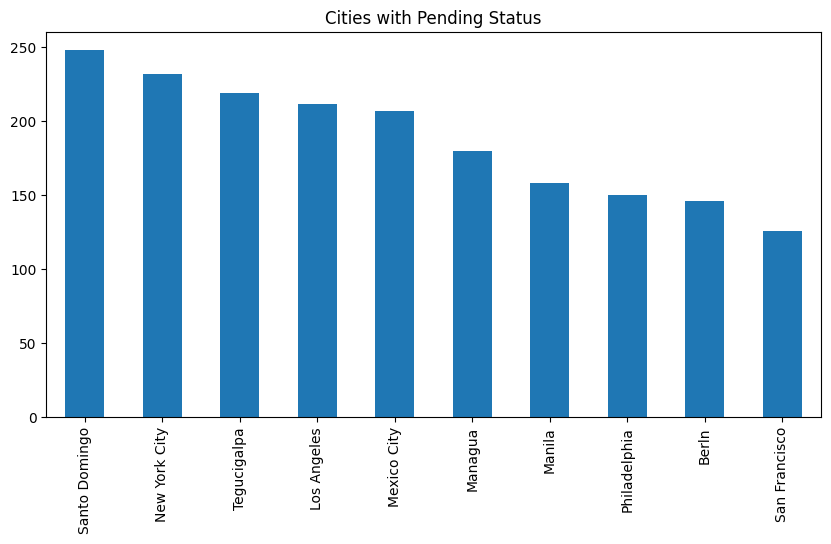

In [ ]:
order_pending["Order City"].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Cities with Pending Status")

Total number of different countries

In [ ]:
df['Order Country'].nunique()

164

In [ ]:
df['Order Country'].value_counts()

Estados Unidos       24840
Francia              13222
Mxico                13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Shara Occidental         2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

Which country has most suspected Fraud

In [ ]:
fraud_detected=df[df["Order Status"]=="SUSPECTED_FRAUD"]
fraud_detected

,Type Of Payments,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
10,TRANSFER,6,2,130.580002,272.029999,Shipping canceled,0,73,Sporting Goods,Caguas,...,SUSPECTED_FRAUD,0.0,1360,73,0.0,Smart watch,327.750000,0,1/19/2018 9:18,Second Class
24,TRANSFER,2,2,90.279999,288.420013,Shipping canceled,0,73,Sporting Goods,Billings,...,SUSPECTED_FRAUD,0.0,1360,73,0.0,Smart watch,327.750000,0,1/15/2018 4:24,Second Class
183,TRANSFER,5,4,28.850000,128.220001,Shipping canceled,0,13,Electronics,Freeport,...,SUSPECTED_FRAUD,77041.0,278,13,0.0,Under Armour Men's Compression EV SL Slide,44.990002,0,5/13/2016 17:42,Standard Class
184,TRANSFER,5,4,133.910004,278.970001,Shipping canceled,0,9,Cardio Equipment,Fort Washington,...,SUSPECTED_FRAUD,85234.0,191,9,0.0,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/7/2016 19:51,Standard Class
185,TRANSFER,6,4,79.160004,272.970001,Shipping canceled,0,9,Cardio Equipment,Bakersfield,...,SUSPECTED_FRAUD,95123.0,191,9,0.0,Nike Men's Free 5.0+ Running Shoe,99.989998,0,8/20/2016 2:51,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180274,TRANSFER,5,2,163.190002,339.980011,Shipping canceled,0,45,Fishing,Caguas,...,SUSPECTED_FRAUD,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2/3/2016 3:49,Second Class
180309,TRANSFER,2,1,114.830002,347.980011,Shipping canceled,0,45,Fishing,Modesto,...,SUSPECTED_FRAUD,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/28/2016 21:52,First Class
180352,TRANSFER,4,4,90.000000,399.980011,Shipping canceled,0,45,Fishing,Albuquerque,...,SUSPECTED_FRAUD,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/29/2016 3:08,Standard Class
180406,TRANSFER,6,4,-333.179993,399.980011,Shipping canceled,0,45,Fishing,Caguas,...,SUSPECTED_FRAUD,0.0,1004,45,0.0,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/28/2016 12:46,Standard Class


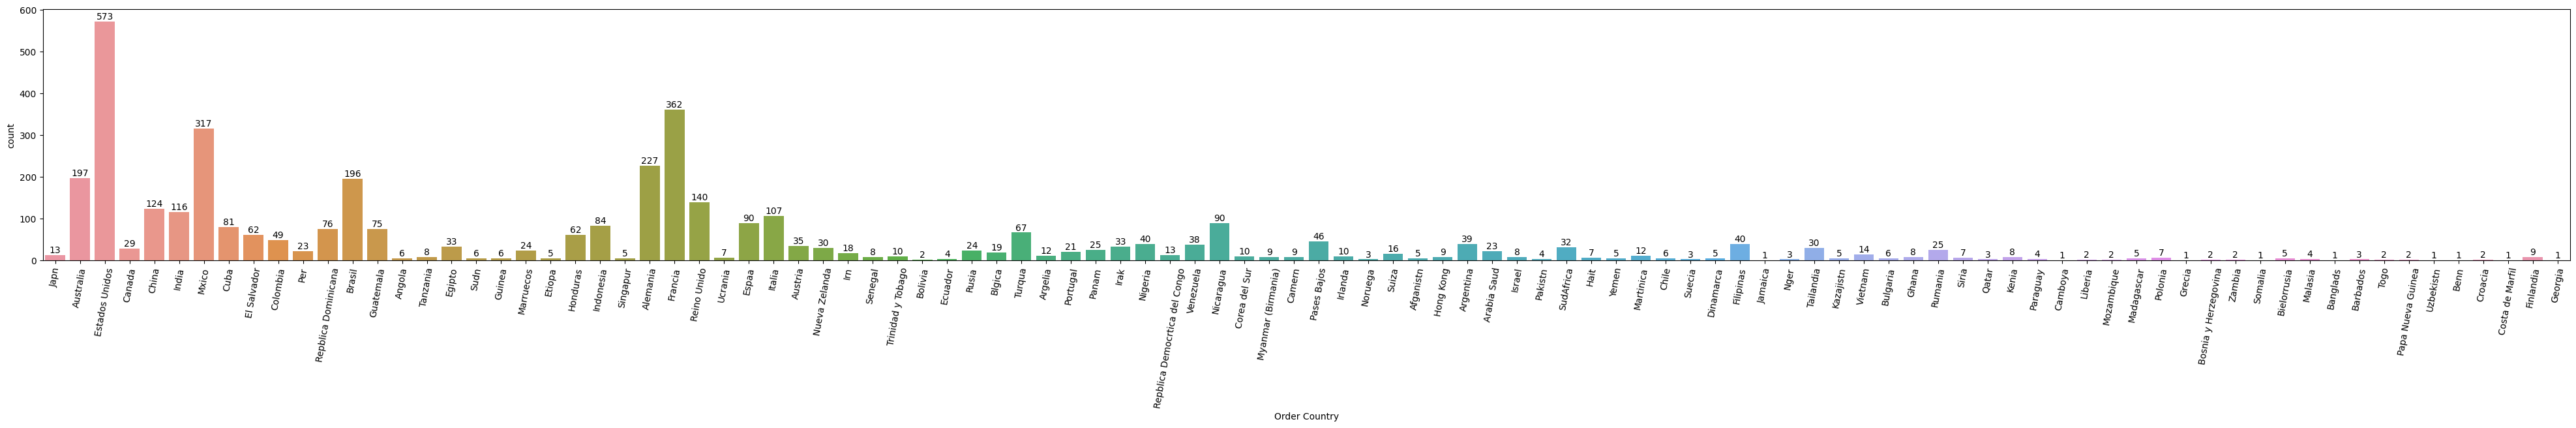

In [ ]:
#order Country
plt.figure(figsize=(50,5))

ax=sns.countplot(data=fraud_detected,x="Order Country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [ ]:
#customer country
fraud_detected["Customer Country"].value_counts()

EE. UU.        2413
Puerto Rico    1649
Name: Customer Country, dtype: int64

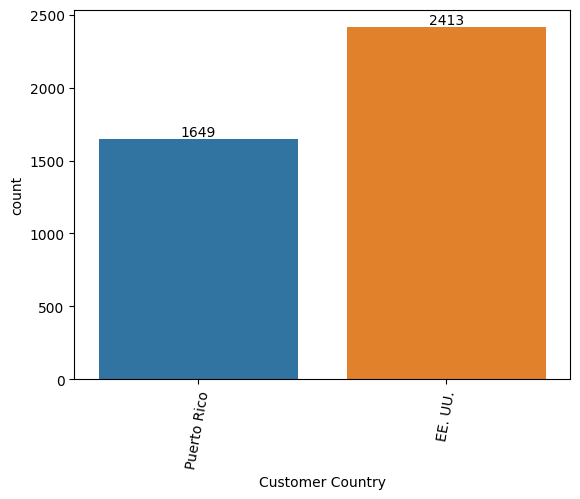

In [ ]:
ax=sns.countplot(data=fraud_detected,x="Customer Country")
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Which product has maximum discount

In [ ]:
df2=pd.DataFrame(df, columns=["Product Name","Order Item Discount"])
df2.groupby(["Product Name","Order Item Discount"]).sum().sort_values(by="Order Item Discount",ascending=False).head(1)

,
Product Name,Order Item Discount
SOLE E35 Elliptical,500.0


Delivery Status

In [ ]:
#By Order
delivery_status=df.groupby(["Delivery Status"])["Order Id"].count().reset_index(name="Number of orders")
px.bar(delivery_status,x=delivery_status["Delivery Status"],y=delivery_status["Number of orders"],
       labels={"Delivery Status":"Delivery Status","Number of orders":"Number of orders"},
      title="Categorised Orders with delivery status")

In [ ]:
#By Order Ragion
delivery_status_region=df.groupby(["Delivery Status","Order Region"])["Order Id"].count().reset_index(name="Number of orders")
px.bar(delivery_status_region,x="Delivery Status",y="Number of orders",
       color=delivery_status_region["Order Region"],
       labels={"Delivery Status":"Delivery Status","Number of orders":"Number of orders"})

Which item has maximum profit ratio

In [ ]:
profit_data=df.groupby(["Product Name"])["Order Item Profit Ratio"].count().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(10)
px.bar(profit_data,x=profit_data["Product Name"],y=profit_data["Profit"],
        labels={"Product Name":"Product Name","Profit":"Profit"})

Top 10 Customer by profit

In [ ]:
df["Customer_ID_STR"]=df['Customer Id'].astype(str)

customer_profit=df.groupby(["Customer_ID_STR"])["Order Profit Per Order"].sum().reset_index(name="Profit").sort_values(by="Profit",ascending=False).head(10)
px.bar(customer_profit,x=customer_profit["Profit"],y=customer_profit["Customer_ID_STR"],
       color=customer_profit["Profit"],
       labels={"Customer_ID_STR":"Customer_ID_STR","Profit":"Profit"},
      title="Which customer is has maximum profit")

Types of payment modes

In [ ]:
df1=df["Type Of Payments"].value_counts()
df1

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type Of Payments, dtype: int64

In [ ]:
#By Customer City

payment_mode=df.groupby(["Type Of Payments","Customer City"])["Order Id"].sum().reset_index(name="Number of orders").sort_values(by="Number of orders",ascending=False)
px.bar(payment_mode,x="Type Of Payments",y="Number of orders",
       color=payment_mode["Customer City"],
       labels={"Type Of Payments":"Type Of Payments","Number of orders":"Number of orders"})

Type of shipping mode

In [ ]:
df1=df["Shipping Mode"].value_counts()
df1

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

Text(0.5, 1.0, 'Shipping Status')

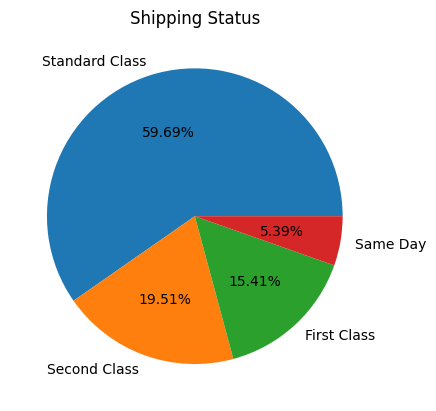

In [ ]:
label=["Standard Class","Second Class","First Class","Same Day"]
plt.pie(df1,labels=label, autopct="%.2f%%")
plt.title("Shipping Status")

In [ ]:
# By Region

shipping_mode_region=df.groupby(["Shipping Mode","Order Region"])["Order Id"].sum().reset_index(name="Number of orders")
px.bar(shipping_mode_region,x="Shipping Mode",y="Number of orders",
       color=shipping_mode_region["Order Region"],
       labels={"Shipping Mode":"Shipping Mode","Number of orders":"Number of orders"})

Which product has maximum price

In [ ]:
df2=pd.DataFrame(df, columns=["Product Name","Product Price"])
df2.groupby(["Product Name","Product Price"]).sum().sort_values(by="Product Price",ascending=False)


,
Product Name,Product Price
SOLE E35 Elliptical,1999.98999
Dell Laptop,1500.00000
SOLE E25 Elliptical,999.98999
Bowflex SelectTech 1090 Dumbbells,599.98999
Bushnell Pro X7 Jolt Slope Rangefinder,599.98999
...,...
Hirzl Women's Hybrid Golf Glove,14.99000
Hirzl Men's Hybrid Golf Glove,14.99000
Toys,11.54000


Customer segment

In [ ]:
df1=df["Customer Segment"].value_counts()
df1

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

Text(0.5, 1.0, 'Customer Segment')

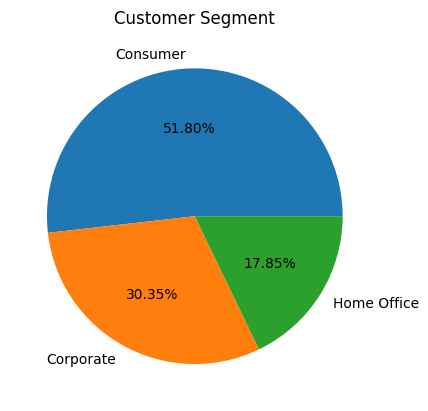

In [ ]:
label=["Consumer","Corporate","Home Office"]
plt.pie(df1,labels=label, autopct="%.2f%%")
plt.title("Customer Segment")

Maximum Category Orders

In [ ]:
category_name=df.groupby(["Category Name"])["Order Id"].count().reset_index(name="Orders").sort_values(by="Orders",ascending=True)
px.bar(category_name,x=category_name["Orders"],y=category_name["Category Name"],
       color=category_name["Orders"],
       labels={"Category Name":"Category Name","Orders":"Orders"},
      title="Maximum Category Orders")

Order benefits per order in specific country

In [ ]:
geo_df = df.groupby(['Order Country'])['Benefit per order'].count().reset_index(name='total order').sort_values(by='total order',ascending=True)
fig = px.choropleth(geo_df ,  locationmode='country names', locations='Order Country',
                    color='total order',hover_name='Order Country')
fig.show()

Sales per year,month and day date

In [ ]:
df['year'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[-1].split(' ')[0])

In [ ]:
df['month'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[0].split(' ')[0])

In [ ]:
df['day date'] = df['order date (DateOrders)'].apply(lambda x: x.split('/')[1].split(' ')[0])

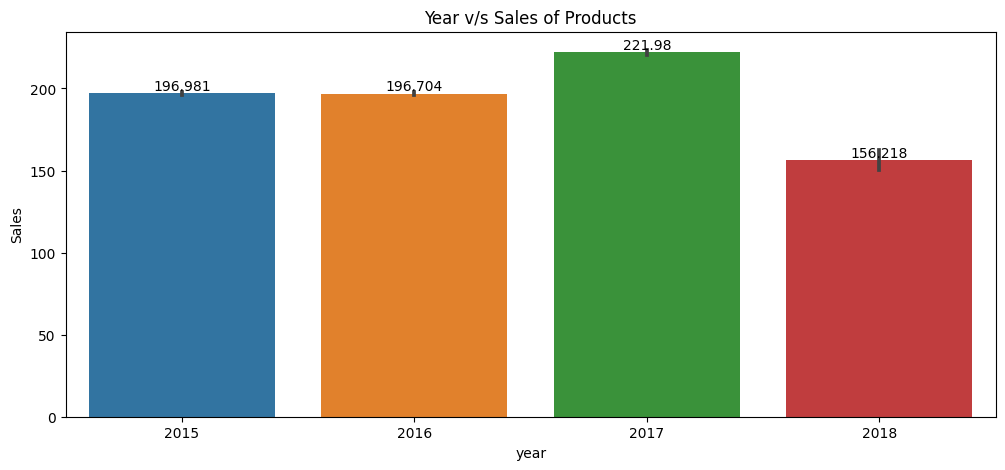

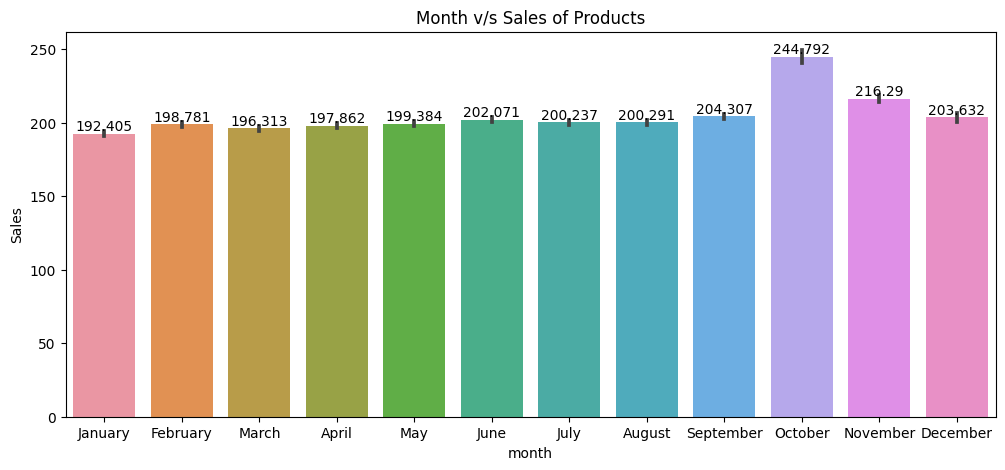

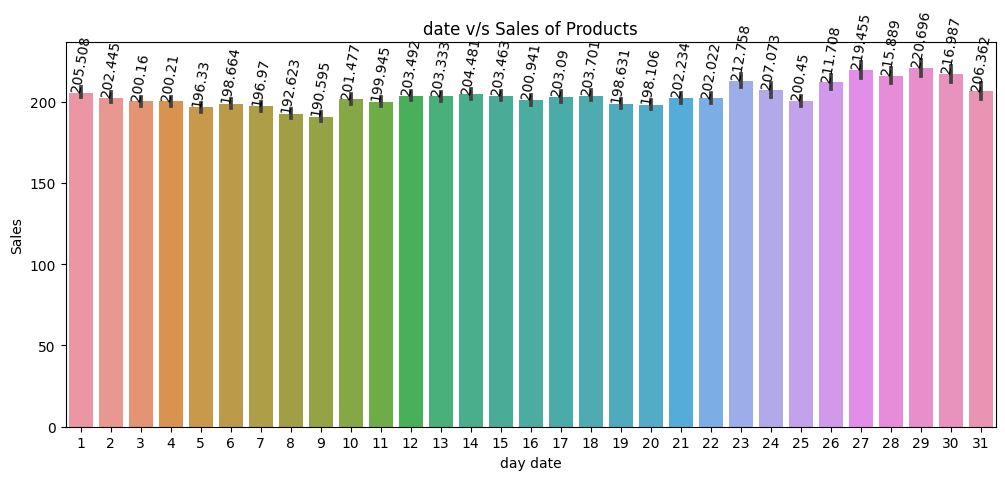

In [ ]:
plt.figure(figsize = (12,5))
plt.title('Year v/s Sales of Products')
ax=sns.barplot(x = 'year', 
            y = 'Sales', 
              order=["2015","2016","2017","2018"],
            data = df);
for i in ax.containers:
    ax.bar_label(i,)

plt.figure(figsize = (12,5))
df["month"]=df["month"].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"])
plt.title('Month v/s Sales of Products')
ax=sns.barplot(x = 'month', 
            y = 'Sales',
            order=["January","February", "March", "April", "May", "June", "July", "August", "September", "October", "November","December"],
            data=df);
for i in ax.containers:
    ax.bar_label(i,)
    
plt.figure(figsize = (12,5))
plt.title('date v/s Sales of Products')
ax=sns.barplot(x = 'day date', 
            y = 'Sales', 
            order=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31'],
            data = df);
for i in ax.containers:
    ax.bar_label(i,rotation=80)
plt.show()

**Data Modeling**

Encoding label

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

Forcasting sales of different product

In [ ]:
data_sales=df[['Type Of Payments','Benefit per order', 'Sales per customer', 'Delivery Status','Late_delivery_risk', 
             'Category Name', 'Customer City','Customer Country','Customer Id','Customer Segment',
             'Customer State', 'Customer Zipcode','Department Name', 'Latitude', 'Longitude', 'Market',
             'Order City', 'Order Country', 'Order Customer Id','order date (DateOrders)', 'Order Id', 
             'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
             'Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity', 'Sales', 
             'Order Item Total','Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
             'Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description', 
             'Product Name', 'Product Price','Product Status', 'shipping date (DateOrders)', 'Shipping Mode']]

In [ ]:
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales'].astype(str)

In [ ]:
features=features.apply(Labelencoder_feature)
features.head()

,Type Of Payments,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,18934,2568,0,0,40,66,1,20649,0,...,2,0,114,47,0,78,62,0,27149,3
1,3,2272,2559,1,1,40,66,1,19386,0,...,5,0,114,47,0,78,62,0,2209,3
2,0,2293,2555,3,0,40,452,0,19385,0,...,1,0,114,47,0,78,62,0,1980,3
3,1,13638,2546,0,0,40,285,0,19384,2,...,2,0,114,47,0,78,62,0,1752,3
4,2,20599,2526,0,0,40,66,1,19383,1,...,6,0,114,47,0,78,62,0,1528,3


In [ ]:
final_features=features[['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)']]

In [ ]:
final_features

,Benefit per order,Sales per customer,Category Name,Customer Id,Customer Segment,Department Name,Market,Order City,Order Customer Id,order date (DateOrders),...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders)
0,18934,2568,40,20649,0,4,3,332,20649,5961,...,2568,18934,15,475,0,114,47,78,62,27149
1,2272,2559,40,19386,0,4,3,392,19386,1147,...,2559,2272,13,841,0,114,47,78,62,2209
2,2293,2555,40,19385,0,4,3,392,19385,1146,...,2555,2293,13,841,0,114,47,78,62,1980
3,13638,2546,40,19384,2,4,3,3226,19384,1145,...,2546,13638,11,835,0,114,47,78,62,1752
4,20599,2526,40,19383,1,4,3,3226,19383,1144,...,2526,20599,11,835,0,114,47,78,62,1528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,15208,2752,18,992,2,3,3,2921,992,1774,...,2752,15208,7,914,0,96,30,24,66,2733
180515,422,2743,18,9066,1,3,3,1362,9066,1758,...,2743,422,7,770,0,96,30,24,66,2339
180516,20768,2734,18,288,1,3,3,25,288,1526,...,2734,20768,11,88,0,96,30,24,66,2727
180517,21463,2725,18,2781,0,3,3,25,2781,1524,...,2725,21463,11,88,0,96,30,24,66,2114


In [ ]:
final_data=pd.concat([final_features,target],axis=1)
final_data.columns

Index(['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Sales'],
      dtype='object')

<Axes: >

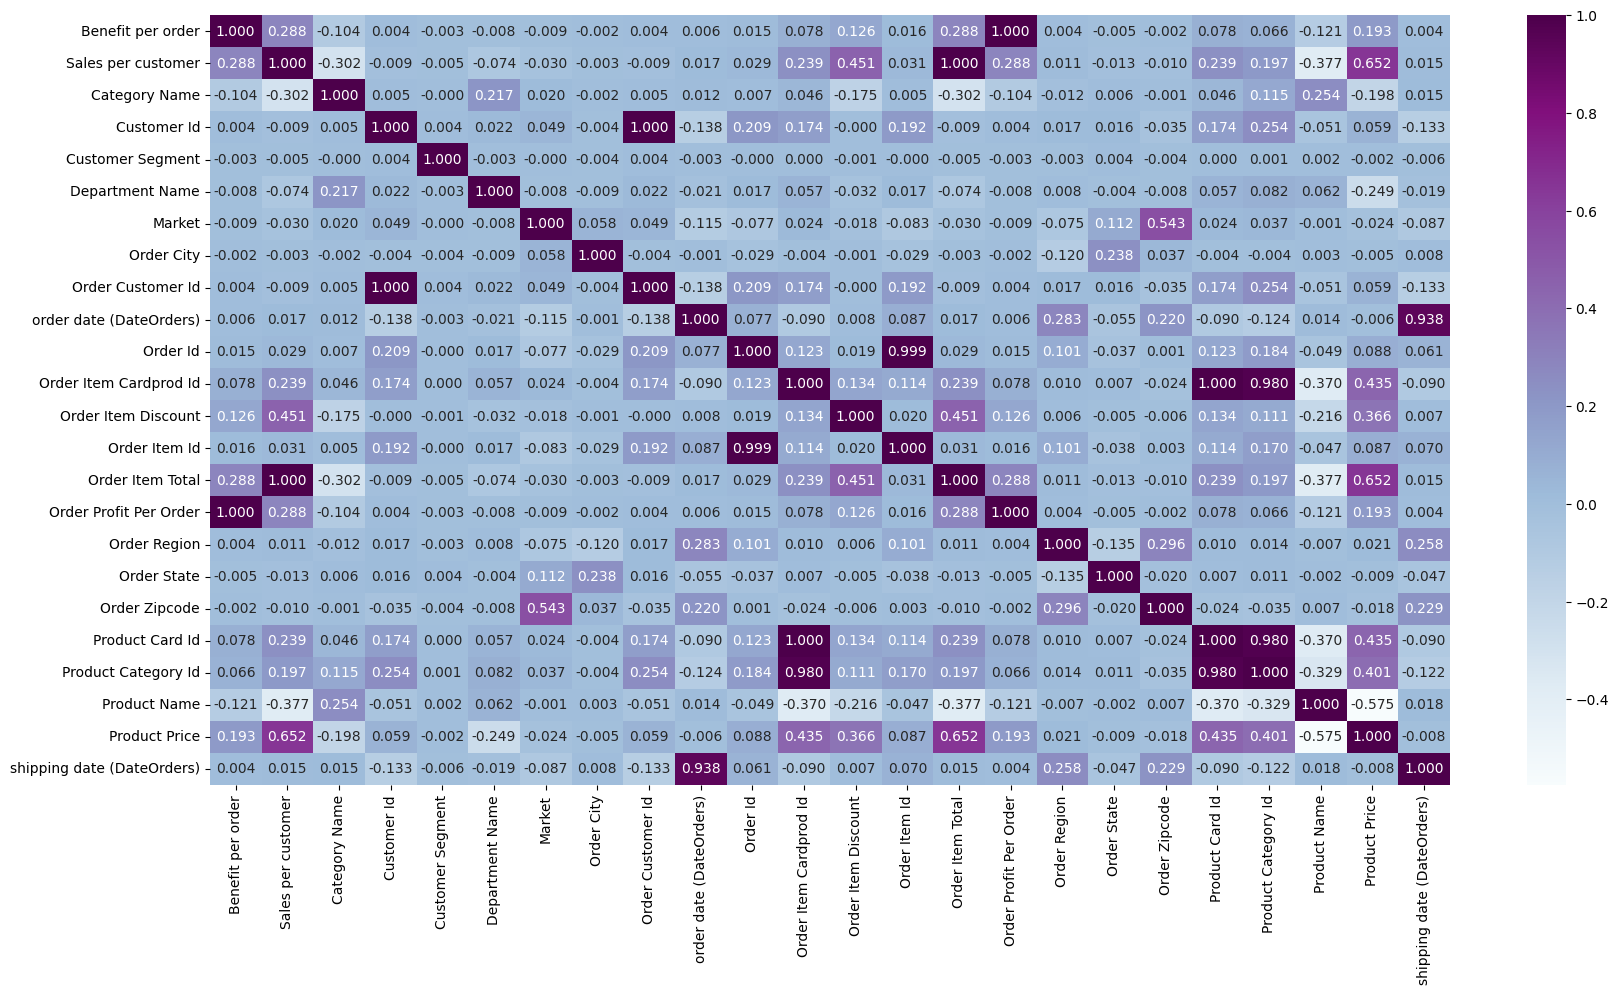

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(),annot=True,fmt=".3f",cmap="BuPu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import *
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
import pickle

***Linear Regression model***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

X_train
y_train

18355     179.9700012
12060     239.9600067
178365    149.9400024
43346     399.9599915
97384     24.98999977
             ...     
5098            200.0
53593     199.9900055
119337    179.9700012
87422      399.980011
164812    87.95999908
Name: Sales, Length: 126363, dtype: object

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
y_pred =linReg.predict(X_test)
y_pred

array([ 73.35185353, 147.33532474, 122.92517533, ..., 231.17550534,
       378.16631954, 200.95672309])

In [ ]:
ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is: 0.7909661721368646
mean_sqrd_error is 3673.436733235185
root_mean_squared error of is 60.6088832864885


In [ ]:
lin_train_predict = pd.DataFrame({'actual' : y_train,
                                 'predicted' : linmodel.predict(X_train)})
lin_train_predict.head(10)

,actual,predicted
18355,179.9700012,180.757822
12060,239.9600067,230.148903
178365,149.9400024,151.247114
43346,399.9599915,374.561513
97384,24.98999977,28.372872
83974,129.9900055,121.253058
7569,159.9600067,183.556418
97975,199.9799957,274.645570
119910,299.9500122,275.237694
156983,250.0,263.974558


***Lasso***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
lasReg=Lasso()
lasmodel=lasReg.fit(X_train,y_train)

In [ ]:
y_prediction =lasReg.predict(X_test)
y_prediction

array([387.50419206, 389.76823543, 199.25030132, ...,  86.23236619,
       396.10299166, 207.59390437])

In [ ]:
ls_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,ls_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.8007551391576109
mean_sqrd_error is 3412.9275470836005
root_mean_squared error of is 58.42026657833393


Ridge regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
ridReg=Ridge()
ridmodel=ridReg.fit(X_train,y_train)

In [ ]:
y_prediction =ridReg.predict(X_test)
y_prediction

array([252.59721661, 341.12852644, 208.61073251, ..., 326.17230302,
       155.66972665, 207.27006238])

In [ ]:
rd_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rd_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.7980861527025687
mean_sqrd_error is 3494.6053244132254
root_mean_squared error of is 59.1151869185341


***KNN***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
knncls=KNeighborsClassifier()
knncls.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_prediction =knncls.predict(X_test)
y_prediction

array(['100.0', '129.9900055', '299.9500122', ..., '59.99000168',
       '127.9599991', '150.0'], dtype=object)

In [ ]:
knn_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,knn_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.5604278259295521
mean_sqrd_error is 7474.663605204178
root_mean_squared error of is 86.45613688573054


In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

       100.0       0.07      0.19      0.10      1326
 103.9800034       0.00      0.00      0.00        25
 104.9700012       0.01      0.03      0.02        29
       108.0       0.00      0.00      0.00        24
 109.9400024       0.00      0.00      0.00        15
 109.9499969       0.00      0.00      0.00        34
 109.9899979       0.00      0.00      0.00        25
 11.28999996       0.89      0.97      0.93        80
 11.53999996       0.95      1.00      0.97       138
       110.0       0.03      0.06      0.04        18
 111.9599991       0.02      0.04      0.03        23
 119.9599991       0.00      0.00      0.00        16
 119.9700012       0.02      0.04      0.03       660
 119.9800034       0.06      0.11      0.07      1497
 119.9899979       0.00      0.00      0.00        29
       120.0       0.00      0.00      0.00        55
 124.9499969       0.00      0.00      0.00       141
 124.9899979       0.00    

***Naive bayes***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
sc=StandardScaler()

In [ ]:
x_scaler=sc.fit_transform(final_features)

In [ ]:
pipe=Pipeline(steps=[("sc",sc),("Guaasinnb", GaussianNB())])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()), ('Guaasinnb', GaussianNB())])

In [ ]:
gu_Score=pipe.score(X_test, y_test)
gu_Score

0.9123827461407785

***SVM***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
svmcls=svm.SVC()
svmodel=svmcls.fit(X_train,y_train)

In [ ]:
y_prediction =svmcls.predict(X_test)
y_prediction

array(['129.9900055', '129.9900055', '129.9900055', ..., '399.980011',
       '59.99000168', '452.0400085'], dtype=object)

In [ ]:
svc_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,svc_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.5849941854239815
mean_sqrd_error is 8633.050359003613
root_mean_squared error of is 92.91420967216808


***Gradient Boost***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
xgbcls=GradientBoostingClassifier()
xgbmodel=xgbcls.fit(X_train,y_train)

In [ ]:
y_prediction =xgbcls.predict(X_test)
y_prediction

array(['109.9499969', '109.9499969', '109.9499969', ..., '109.9499969',
       '109.9499969', '109.9499969'], dtype=object)

In [ ]:
gb_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,gb_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: -0.31349793968019024
mean_sqrd_error is 26978.654164344985
root_mean_squared error of is 164.2518010992421


***Decison tree***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
dectreecls=DecisionTreeClassifier()
dectreecls.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_prediction =dectreecls.predict(X_test)
y_prediction

array(['129.9900055', '399.980011', '299.980011', ..., '299.9500122',
       '14.98999977', '149.9400024'], dtype=object)

In [ ]:
dt_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,dt_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9998623344579236
mean_sqrd_error is 2.460693521716934
root_mean_squared error of is 1.568659785204215


***Random Forest***

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

In [ ]:
rfcls=RandomForestClassifier(random_state=42)
rfmodel=rfcls.fit(X_train,y_train)

In [ ]:
y_prediction =rfcls.predict(X_test)
y_prediction

array(['100.0', '199.9199982', '129.9900055', ..., '199.9900055',
       '129.9900055', '99.95999908'], dtype=object)

In [ ]:
rf_score=r2_score(y_test,y_prediction)
print("r2 socre is:" ,rf_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is: 0.9998961560092426
mean_sqrd_error is 1.7820087659027604
root_mean_squared error of is 1.3349190109900901


In [ ]:
cm=confusion_matrix(y_test, y_prediction)
cm

array([[1288,    0,    0, ...,    0,    0,    0],
       [   0,   29,    0, ...,    0,    0,    0],
       [   0,    0,   39, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,   50,    0,    0],
       [   0,    0,    0, ...,    0, 1294,    0],
       [   0,    0,    0, ...,    0,    0,  740]])

In [ ]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

       100.0       1.00      1.00      1.00      1290
 103.9800034       1.00      1.00      1.00        29
 104.9700012       1.00      1.00      1.00        39
       108.0       1.00      1.00      1.00        29
 109.9400024       1.00      1.00      1.00        17
 109.9499969       1.00      0.98      0.99        46
 109.9899979       1.00      1.00      1.00        29
 11.28999996       1.00      1.00      1.00        86
 11.53999996       1.00      1.00      1.00       159
       110.0       0.92      1.00      0.96        12
 111.9599991       1.00      1.00      1.00        18
 119.9599991       1.00      0.91      0.95        23
 119.9700012       1.00      1.00      1.00       672
 119.9800034       1.00      1.00      1.00      1464
 119.9899979       1.00      1.00      1.00        24
       120.0       0.97      0.98      0.97        57
 124.9499969       0.99      1.00      0.99       142
 124.9899979       1.00    

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_prediction, mode='markers' ,  name='predicted vs actual'))
fig.add_trace(go.Scatter(x=y_test , y=y_test, mode='lines' , name='actual'))


fig.update_layout(title='actual Sales vs predicted Sales', xaxis_title= 'Actual Score', yaxis_title = 'Predicted Score' , template= 'plotly_dark')

Output hidden; open in https://colab.research.google.com to view.

***LSTM***

In [ ]:
#LSTM

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_features)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], final_features.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], final_features.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, final_features.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))


Epoch 1/10
126361/126361 - 195s - loss: 0.0400 - 195s/epoch - 2ms/step
Epoch 2/10
126361/126361 - 175s - loss: 0.0396 - 175s/epoch - 1ms/step
Epoch 3/10
126361/126361 - 175s - loss: 0.0395 - 175s/epoch - 1ms/step
Epoch 4/10
126361/126361 - 174s - loss: 0.0394 - 174s/epoch - 1ms/step
Epoch 5/10
126361/126361 - 173s - loss: 0.0394 - 173s/epoch - 1ms/step
Epoch 6/10
126361/126361 - 173s - loss: 0.0393 - 173s/epoch - 1ms/step
Epoch 7/10
126361/126361 - 174s - loss: 0.0393 - 174s/epoch - 1ms/step
Epoch 8/10
126361/126361 - 177s - loss: 0.0393 - 177s/epoch - 1ms/step
Epoch 9/10
126361/126361 - 175s - loss: 0.0393 - 175s/epoch - 1ms/step
Epoch 10/10
126361/126361 - 174s - loss: 0.0393 - 174s/epoch - 1ms/step
1693/1693 [==============================] - 2s 1ms/step
r2 socre is: 0.0522864286057616
mean_sqrd_error is 0.04600765781768553
root_mean_squared error of is 0.2144939575318744


***GRU***

In [ ]:
#GRU

from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_features)

# Split data into train and test sets
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Create X and y datasets
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], final_features.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], final_features.shape[1]))

# Define GRU model
model = Sequential()
model.add(GRU(50, input_shape=(look_back, final_features.shape[1])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train GRU model
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Predict on test set
y_pred = model.predict(X_test)

ln_score=r2_score(y_test,y_pred)
print("r2 socre is:" ,ln_score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))


Epoch 1/10
126361/126361 - 178s - loss: 0.0401 - 178s/epoch - 1ms/step
Epoch 2/10
126361/126361 - 176s - loss: 0.0396 - 176s/epoch - 1ms/step
Epoch 3/10
126361/126361 - 174s - loss: 0.0395 - 174s/epoch - 1ms/step
Epoch 4/10
126361/126361 - 175s - loss: 0.0394 - 175s/epoch - 1ms/step
Epoch 5/10
126361/126361 - 178s - loss: 0.0394 - 178s/epoch - 1ms/step
Epoch 6/10
126361/126361 - 176s - loss: 0.0394 - 176s/epoch - 1ms/step
Epoch 7/10
126361/126361 - 176s - loss: 0.0393 - 176s/epoch - 1ms/step
Epoch 8/10
126361/126361 - 176s - loss: 0.0393 - 176s/epoch - 1ms/step
Epoch 9/10
126361/126361 - 176s - loss: 0.0393 - 176s/epoch - 1ms/step
Epoch 10/10
126361/126361 - 175s - loss: 0.0393 - 175s/epoch - 1ms/step
1693/1693 [==============================] - 2s 1ms/step
r2 socre is: 0.05200631981387138
mean_sqrd_error is 0.046021255965731526
root_mean_squared error of is 0.2145256533977499


**All algorithms accurcy in tabale**

In [ ]:
from tabulate import tabulate
data = [["Linear Regression", "0.79012"], 
        ["Lasso Regressor", "0.79540"], 
        ["Ridge Regressor", "0.79803"], 
        ["KNN Classifier","0.56850"],
        ["Gaussian Naive bayes","0.91350"],
        ["SVM Classifier","0.58499"],
        ["Gradient Boost"," -0.31349"],
        ["Decision Tree","0.99989"],
        ["Random Forest","0.99984"],
        ["LSTM Model","0.05196"],
        ["Gated Recurrent Unit","0.05285"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names))

Algorithms              Accuracy
--------------------  ----------
Linear Regression        0.79012
Lasso Regressor          0.7954
Ridge Regressor          0.79803
KNN Classifier           0.5685
Gaussian Naive bayes     0.9135
SVM Classifier           0.58499
Gradient Boost          -0.31349
Decision Tree            0.99989
Random Forest            0.99984
LSTM Model               0.05196
Gated Recurrent Unit     0.05285


Create chart for accuracy of algorithms

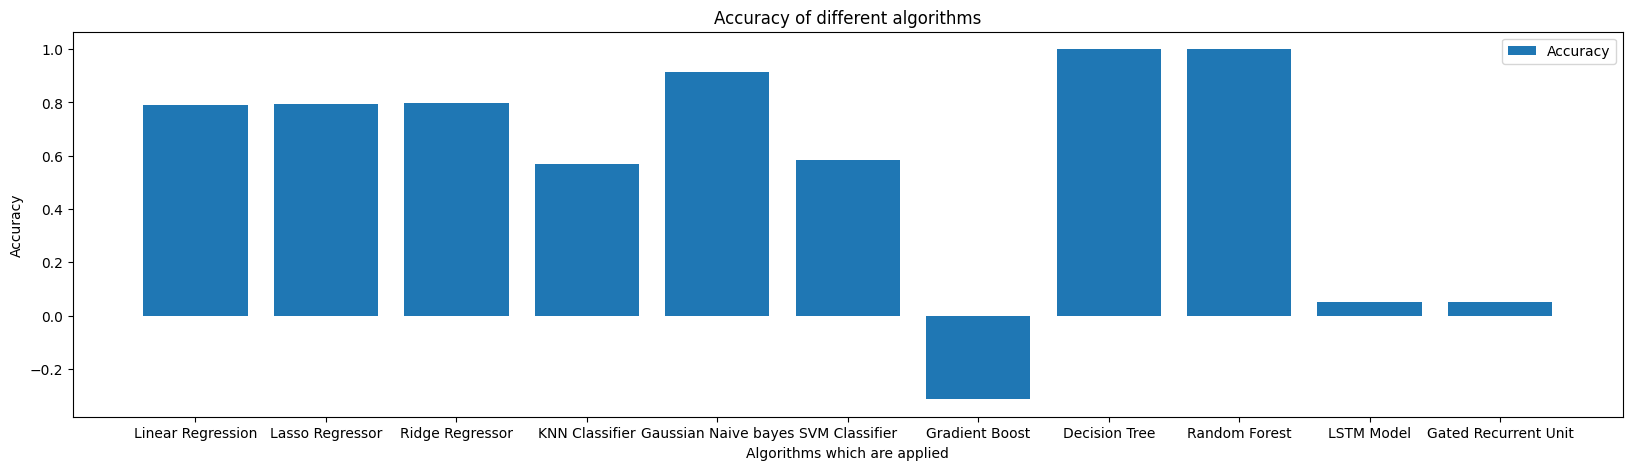

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(["Linear Regression","Lasso Regressor","Ridge Regressor","KNN Classifier","Gaussian Naive bayes",
         "SVM Classifier","Gradient Boost","Decision Tree","Random Forest","LSTM Model","Gated Recurrent Unit"],
    [0.79012,0.79540,0.79803,0.56850,0.91350,0.58499, -0.31349,0.99989,0.99948,0.05196,0.05285],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()

# **Statistical Models**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

data_sales = df[['Type Of Payments','Benefit per order', 'Sales per customer', 'Delivery Status','Late_delivery_risk', 
             'Category Name', 'Customer City','Customer Country','Customer Id','Customer Segment',
             'Customer State', 'Customer Zipcode','Department Name', 'Latitude', 'Longitude', 'Market',
             'Order City', 'Order Country', 'Order Customer Id','order date (DateOrders)', 'Order Id', 
             'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
             'Order Item Product Price', 'Order Item Profit Ratio','Order Item Quantity', 'Sales', 
             'Order Item Total','Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
             'Order Zipcode', 'Product Card Id', 'Product Category Id','Product Description', 
             'Product Name', 'Product Price','Product Status', 'shipping date (DateOrders)']]

features = data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target = data_sales['Sales'].astype(str)

features = features.apply(Labelencoder_feature)
final_features = features[['Benefit per order', 'Sales per customer', 'Category Name',
       'Customer Id', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Customer Id', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Id', 'Order Item Total', 'Order Profit Per Order',
       'Order Region', 'Order State', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)']]

final_data = pd.concat([final_features,target],axis=1)
final_data.columns

# Define a function to evaluate the model performance
def evaluate_model(y_test, y_pred):
    r2score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    
    return r2score, mse, rmse, mae


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sales', axis=1), df['Sales'], test_size=0.2, random_state=42)


***Multilayer Perceptron model***

In [ ]:
from sklearn.neural_network import MLPRegressor

# Multilayer Perceptron model
X_train,X_test,y_train,y_test=train_test_split(final_features,target,test_size=0.3)

mlpReg = MLPRegressor(hidden_layer_sizes=(100,50,), activation='relu', solver='adam', max_iter=1000)
mlpmodel = mlpReg.fit(X_train, y_train)

y_prediction = mlpReg.predict(X_test)

mlp_score = r2_score(y_test, y_prediction)
print("r2 score is:", mlp_score)
print("mean squared error is:", mean_squared_error(y_test, y_prediction))
print("root mean squared error is:", np.sqrt(mean_squared_error(y_test, y_prediction)))

mlp_train_predict = pd.DataFrame({'actual': y_train,
                                  'predicted': mlpmodel.predict(X_train)})
mlp_train_predict.head(10)



r2 score is: 0.786168802475631
mean squared error is: 3686.890601922515
root mean squared error is: 60.71977109576843


,actual,predicted
103730,199.9900055,234.084152
143687,49.97999954,30.783753
19825,399.980011,405.281384
66838,299.980011,328.445419
65111,299.980011,331.468481
45022,129.9900055,101.591036
40068,399.9599915,392.452370
154405,100.0,146.185898
134913,129.9900055,149.754301
56758,299.9700012,385.705075


***Ordinary Least Squares (OLS)***

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Convert Sales column to float type
final_data['Sales'] = final_data['Sales'].astype(float)

# Split the data into features and target variable
X = final_data['Product Price']
y = final_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add constant to the features matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the OLS model
model = sm.OLS(y_train, X_train)

# Fit the OLS model
results = model.fit()

# Make predictions on the testing set
y_prediction = results.predict(X_test)

# Calculate evaluation metrics
r2_score = r2_score(y_test, y_prediction)
mean_squared_error = mean_squared_error(y_test, y_prediction)
root_mean_squared_error = np.sqrt(mean_squared_error)

# Print the summary statistics and evaluation metrics of the model
print(results.summary())
print("r2 score is:", r2_score)
print("mean squared error is:", mean_squared_error)
print("root mean squared error is:", root_mean_squared_error)

# Create a dataframe with actual and predicted values for the training set
predict = pd.DataFrame({'actual': y_train,
                        'predicted': results.predict(X_train)})
predict.head(10)



                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 8.088e+04
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:48:37   Log-Likelihood:            -7.6498e+05
No. Observations:              126363   AIC:                         1.530e+06
Df Residuals:                  126361   BIC:                         1.530e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.9626      0.660     52.986

,actual,predicted
99963,149.940002,132.947981
63538,210.850006,286.925077
6661,179.970001,156.277844
93913,129.990005,235.599378
90626,129.990005,235.599378
1250,327.750000,324.252858
162902,299.980011,314.920913
31442,499.950012,202.937570
56988,119.970001,118.950064
36590,299.980011,314.920913


***T-test***

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data[['Sales', 'Product Price']], final_data['Sales'], test_size=0.3, random_state=42)

# Perform T-test
t_test = stats.ttest_ind(X_train['Sales'], X_train['Product Price'])

# Fit linear regression model to training data
model = sm.OLS(y_train, X_train).fit()

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate r2 score
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Create dataframe with actual and predicted values
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})

# Display T-test result, r2 score, mean squared error, and root mean squared error
print('T-test:', t_test)
print('r2 score:', r2)
print('mean squared error:', mse)
print('root mean squared error:', rmse)
print('Actual vs predicted values:')
print(df.head(10))


T-test: Ttest_indResult(statistic=447.1185798522987, pvalue=0.0)
r2 score: 1.0
mean squared error: 7.581356619824991e-25
root mean squared error: 8.707098609654648e-13
Actual vs predicted values:
            actual   predicted
80120   199.990005  199.990005
19670   250.000000  250.000000
114887  249.899994  249.899994
120110  299.980011  299.980011
56658   119.970001  119.970001
99465   199.919998  199.919998
40749   399.980011  399.980011
22688   299.970001  299.970001
154389  100.000000  100.000000
47301   119.970001  119.970001


***Chi-square test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import classification_report, accuracy_score


# Create cross-tabulation table of Sales and Product Price
observed = pd.crosstab(final_data['Sales'], final_data['Product Price'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Display chi-square test results
print('Chi-Square test statistic:', chi2)
print('p-value:', p_value)
print('Degrees of freedom:', dof)

# Predict Sales using Product Price as a feature
y_true = final_data['Sales']
y_pred = final_data['Product Price'] > final_data['Product Price'].mean()

# Convert y_true into binary values
threshold = final_data['Sales'].mean()
y_true = (y_true > threshold).astype(int)

# Compute classification report and accuracy score
report = classification_report(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Display performance evaluation metrics
print('Classification report:')
print(report)
print('Accuracy score:', accuracy)


Chi-Square test statistic: 12928717.6510641
p-value: 0.0
Degrees of freedom: 14208
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70    116975
           1       0.48      0.58      0.53     63544

    accuracy                           0.63    180519
   macro avg       0.61      0.62      0.61    180519
weighted avg       0.65      0.63      0.64    180519

Accuracy score: 0.6337670826893568


***Kruskal-Wallis test***

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = final_data['Product Price'].values.reshape(-1, 1)
y = final_data['Sales'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics
print('R2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)


NameError: ignored

**All Statistical models accurcy in table**

In [ ]:
from tabulate import tabulate
data = [["Multiple Linear Regression", "0.78616"], 
        ["Ordinary Least Squares (OLS)", "0.39789"], 
        ["T-test", "1.0"], 
        ["Chi-square test","0.63376"],
        ["Kruskal-Wallis test","0.39789"]]
  
col_names = ["Algorithms", "Accuracy"]
  
print(tabulate(data, headers=col_names)) 

Algorithms                      Accuracy
----------------------------  ----------
Multiple Linear Regression       0.78616
Ordinary Least Squares (OLS)     0.39789
T-test                           1
Chi-square test                  0.63376
Kruskal-Wallis test              0.39789


Create chart for accuracy of algorithms

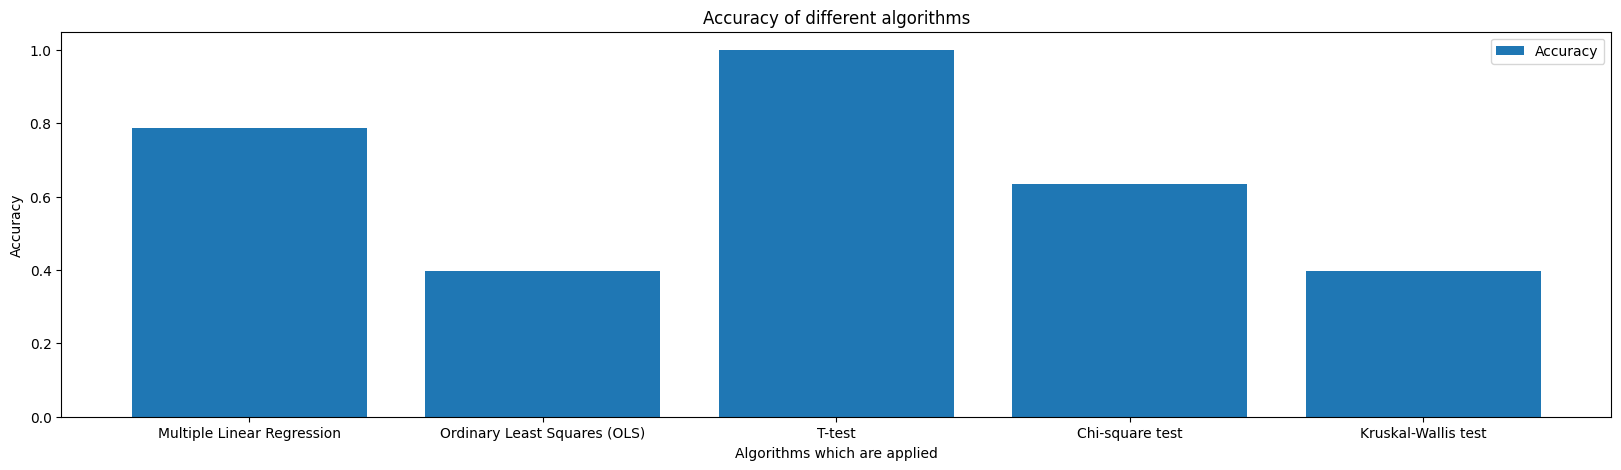

In [ ]:
plt.figure(figsize = (20,5))
plt.bar(["Multiple Linear Regression","Ordinary Least Squares (OLS)","T-test","Chi-square test","Kruskal-Wallis test"],
    [0.78616,0.39789,1.0,0.63376,0.39789],label="Accuracy")
plt.legend()
plt.xlabel("Algorithms which are applied")
plt.ylabel("Accuracy")
plt.title("Accuracy of different algorithms")

plt.show()
